#  Iris Flower Classification
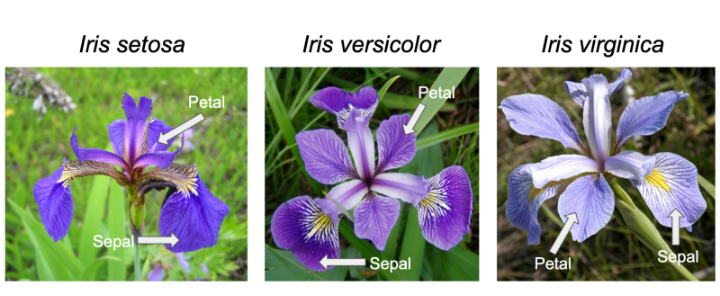

**Project By: Moksh Jaiswal**

### Project Description:
The Iris flower dataset consists of three species: setosa, versicolor, 
and virginica. These species can be distinguished based on thei 
measurements. Now, imagine that you have the measuremen s
of Iris flowers categorized by their respective specieO Y ur
objective is to train a machine learning model that can learn  rom
these measurements and accurately classify the Iris flowers into
their respective species.

### Project Contents
**Collecting Data📊:** Our initial step involves obtaining information from a dataset that includes details about various individuals, specifically whether a Titanic passenger survived. I have obtained this dataset from Kaggle.

**Visualising Data📈📉:** We will closely inspect the data to enhance our understanding using the power of visualisation. This includes identifying and addressing any missing values while gaining insights from the available information.

**Preprocessing Data🔍🧹:** Recognizing that data can be disorganized, our next phase focuses on data wrangling, feature engineering and structuring the data in a format comprehensible to a computer.

**Constructing a Model⚙🏗:** Utilizing a computer program (model), we aim to enable it to learn from the data. The objective is for the model to recognize patterns indicative of whether a Titanic passenger survived.

**Testing the Model🧪:** To validate the effectiveness of our model, we will assess its performance using a distinct dataset that it hasn't encountered previously. This evaluation will gauge the accuracy of our model in making predictions.assengers.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
iris = pd.read_csv(r'C:\Users\pc\CodSoft\Data Science Projects\Task3-Iris Flower Classification\IRIS.csv', encoding='latin')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
row, col = iris.shape
print("Rows:", row, "\nColumns:", col)

Rows: 150 
Columns: 5


In [4]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
iris.nunique()

sepal_length    35
sepal_width     23
petal_length    43
petal_width     22
species          3
dtype: int64

In [7]:
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

## Exploratory Data Analysis
#### 1. Pie Plot

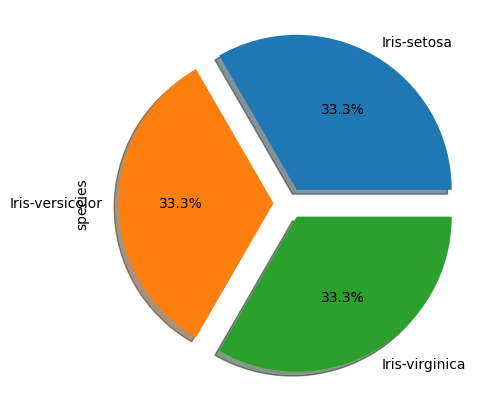

In [8]:
iris.species.value_counts().plot.pie(explode=[0.1, 0.1, 0.1], autopct='%1.1f%%' 
                                    , shadow=True, figsize=(5, 8))
plt.show()

Datapoints are equally distributed for all the three flowers.

#### 2. Pairplot

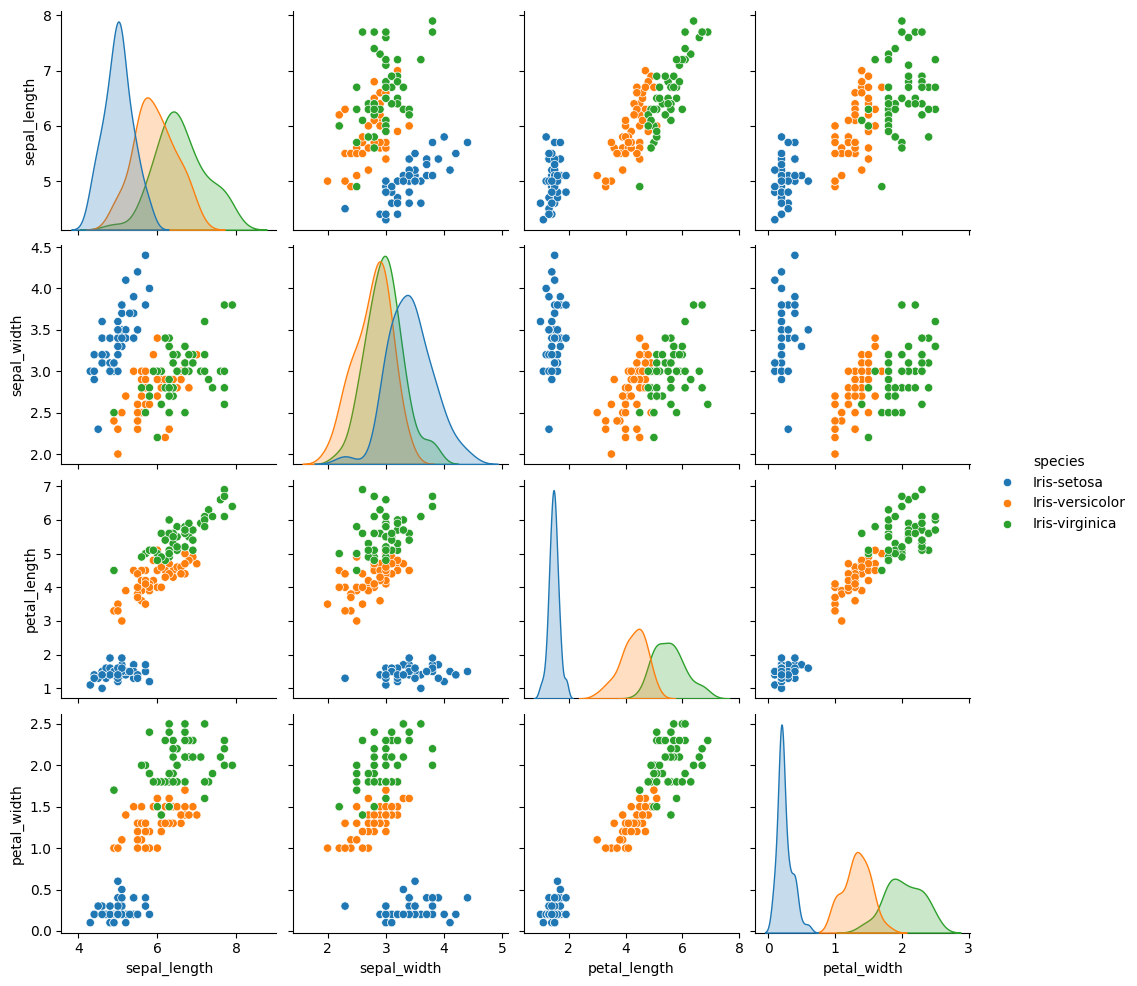

In [9]:
sns.pairplot(iris, hue='species')
plt.show()

The Distribution plot suggests that are data is normaly distributed for all the four features.

#### 3. Box-Plot

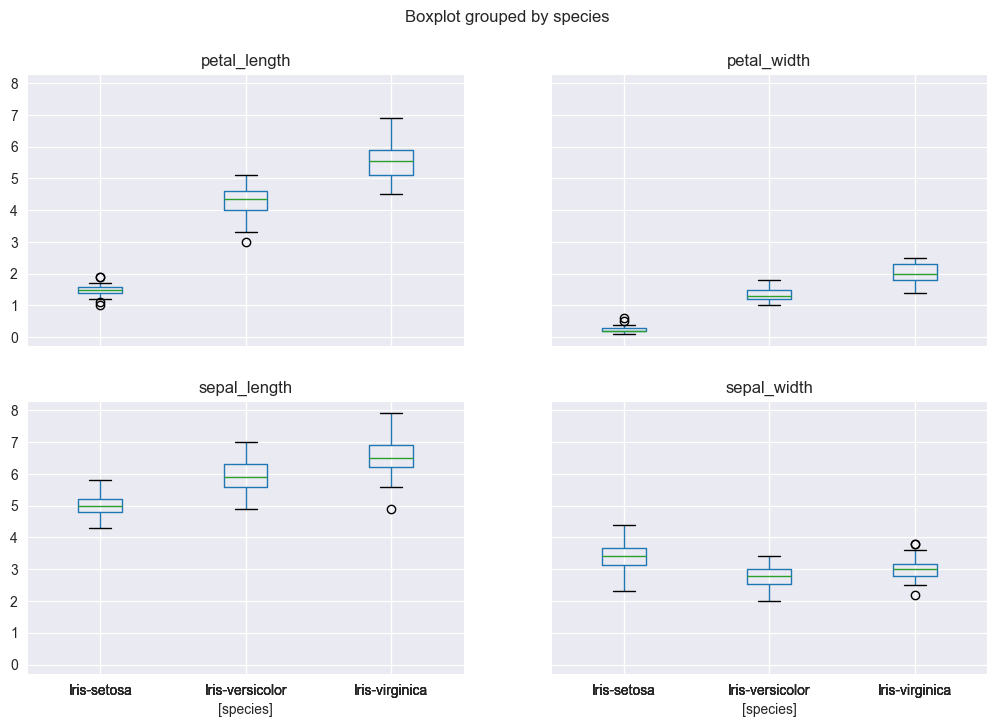

In [10]:
sns.set_style("darkgrid")
iris.boxplot(by='species', figsize=(12,8))

plt.show()

These Boxplots visualises the outliers that are present in our dataset which are as folows: 

- **Outliers**
    - **Iris-Sentosa**
        - petal_length
        - petal_width
    - **Iris-Versicolor**
        - petal_length 
    - **Iris-iris-virginica**
        - sepal_length
        - sepal_width 

## Ordinal Mapping
Here we are converting the categorical features into numerical features

In [11]:
iris['species'] = iris['species'].map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})

#### 4. Correlation Heatmap

In [12]:
corr = iris.corr()

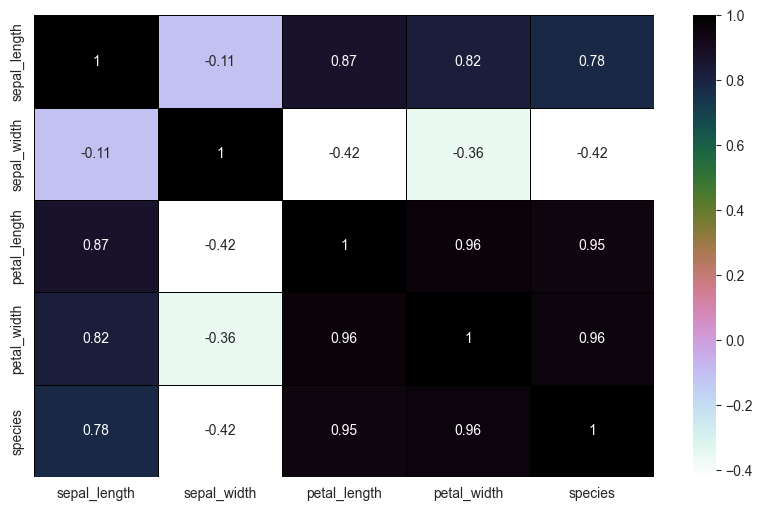

In [13]:
plt.figure(figsize=(10, 6))
sns.heatmap(corr, cmap='cubehelix_r', annot=True, linecolor='black', linewidth='0.5', cbar=True)
plt.show()

These correlations suggest the following:

- **Strong Positive Correlations:**
   - Petal Length and Petal Width exhibit a very strong positive correlation (0.962757).
   - Petal Length and Sepal Length are strongly positively correlated (0.871754).
   - Petal Width and Sepal Length are also strongly positively correlated (0.817954).
   - Petal Width and Petal Length show a strong positive correlation (0.956464).
   - Species is positively correlated with Petal Length (0.949043), Petal Width (0.956464), and Sepal Length (0.782561).

- **Moderate Negative Correlations:**
   - Sepal Width has moderate negative correlations with Petal Length (-0.420516) and Petal Width (-0.356544).
   - Species has a moderate negative correlation with Sepal Width (-0.419446).

These correlation values can provide insights into relationships between different features in the iris dataset. For example, the strong positive correlations between petal-related features suggest that as one of these features increases, the others tend to increase as well. Similarly, the moderate negative correlations with sepal width suggest that as sepal width increases, petal length and petal width tend to decrease to some extent. The positive correlations with species indicate that certain species are associated with specific characteristics in terms of sepal length, petal length, and petal width.

## Splitting Data into Training and Testing datasets

In [14]:
X = iris.iloc[:, :4].values
y = iris.iloc[:, -1].values

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Data Preprocessing
Converting the data into a Standardised form

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

## Building Machine Learning Models
Here, we are going to build several machine learning models and will select the one that gives the best accuracy starting of with two unsupervised machine learning clustering techniques
#### 1. K-Means Classifier
Elbow Method

In [17]:
# Finding the optimum number of clusters for K-Means classification.

from sklearn.cluster import KMeans
wcss = [] # Within Cluster Sum Of Squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)

    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

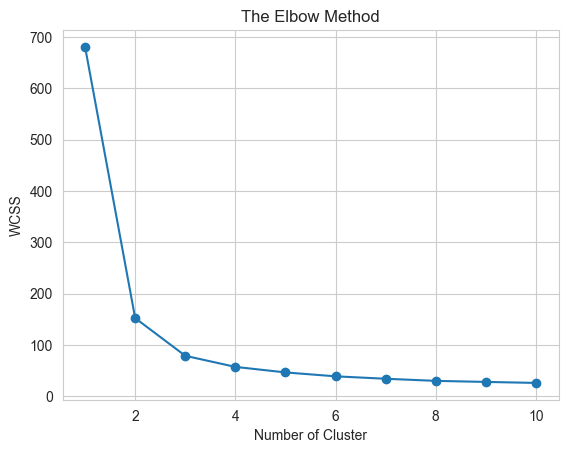

In [18]:
# Plotting the results onto a line graph allows us to observe 'The Elbow' curve

sns.set_style('whitegrid')

plt.plot(range(1, 11), wcss, marker='o', linestyle='-')

plt.title("The Elbow Method")
plt.xlabel("Number of Cluster")
plt.ylabel("WCSS")
plt.show()

We can clearly see why it is called **"The Elbow Method"**. The idea is to plot the within-cluster sum of squares (WCSS) for a range of k values and look for the **"elbow"** point on the graph. The elbow point is the value of k where the rate of decrease in WCSS slows down, indicating a good balance between the number of clusters and the clustering quality.

Here, it can be witnessed from the graph that value of **K** i.e. the optimum number of clusters is **3**.

#### The K-Means Classifier

In [19]:
# Creating the kmean classifier

kmeans = KMeans(n_clusters = 3, init = 'k-means++', 
                random_state = 0)
y_predict = kmeans.fit_predict(X)

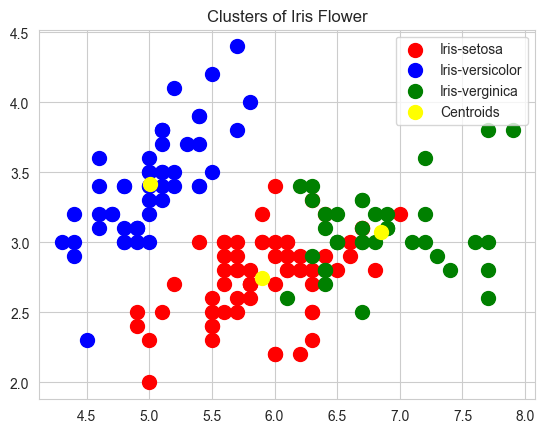

In [20]:
# Visualising the clusters

plt.scatter(X[y_predict == 0, 0], X[y_predict == 0, 1], 
               s = 100, c = 'red', label = 'Iris-setosa')# for first cluster

plt.scatter(X[y_predict == 1, 0], X[y_predict == 1, 1], 
               s = 100, c = 'blue', label = 'Iris-versicolor')# for second cluster

plt.scatter(X[y_predict == 2, 0], X[y_predict == 2, 1], 
               s = 100, c = 'green',label = 'Iris-verginica' )# for third cluster


# Plotting the centroids of the clusters

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
           s = 100, c = 'yellow', label = 'Centroids')

plt.title('Clusters of Iris Flower')
plt.legend()
plt.show()

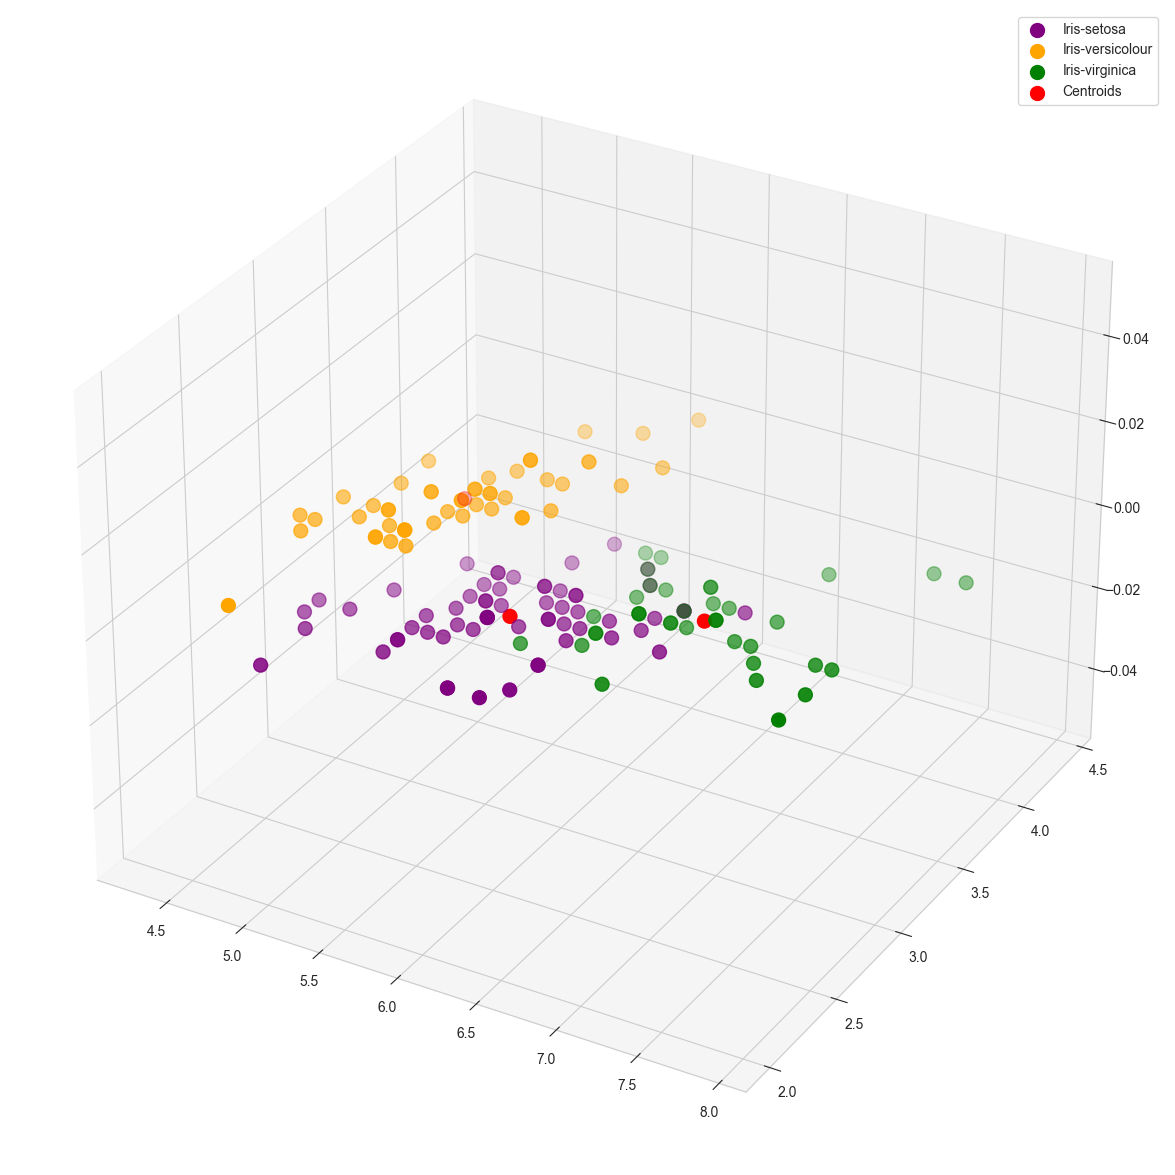

In [21]:
# Creating a 3-D plot

fig = plt.figure(figsize = (15, 15))

ax = fig.add_subplot(111, projection='3d')

plt.scatter(X[y_predict == 0, 0], X[y_predict == 0, 1]
            , s = 100, c = 'purple', label = 'Iris-setosa')

plt.scatter(X[y_predict == 1, 0], X[y_predict == 1, 1]
            , s = 100, c = 'orange', label = 'Iris-versicolour')

plt.scatter(X[y_predict == 2, 0], X[y_predict == 2, 1]
            , s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')
plt.legend()
plt.show()

In [22]:
from sklearn.metrics import adjusted_rand_score

true_labels = iris['species']

# Calculate the Adjusted Rand Index
ari = adjusted_rand_score(true_labels, y_predict)

print(f"Adjusted Rand Index: {ari}")

Adjusted Rand Index: 0.7302382722834697


#### 2. Hierarchical Clustering

In [23]:
from scipy.cluster.hierarchy import dendrogram, linkage

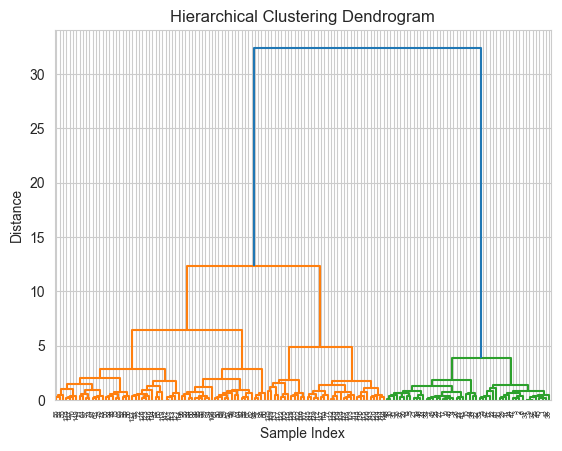

In [24]:
# Perform hierarchical clustering
linked = linkage(X, 'ward')

# Create a dendrogram
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

By looking at the Hierarchy of clusters in the Dendogram we choose the **optimum number of clusters to be 4.**

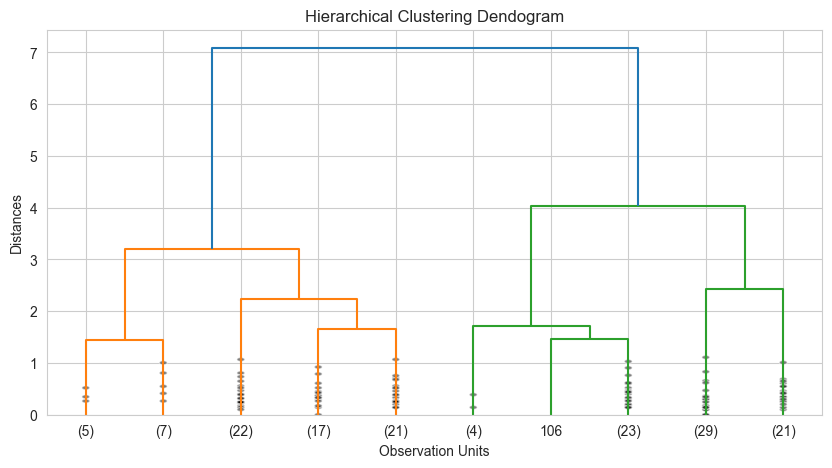

In [25]:
plt.figure(figsize=(10,5)) 

plt.title("Hierarchical Clustering Dendogram")
plt.xlabel("Observation Units")
plt.ylabel("Distances")

dendrogram(linkage(X, 'complete'), leaf_font_size=10, 
          truncate_mode='lastp', p=10, show_contracted=True)

plt.show()

In [26]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Perform hierarchical clustering
model = AgglomerativeClustering(n_clusters=3, linkage='ward')
labels = model.fit_predict(X)

# Calculate silhouette score
silhouette_avg = silhouette_score(X, labels)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.5540972908150553


Hierarchical clustering is a technique used in unsupervised learning for grouping similar data points into clusters. However, **it's not typically used for classification tasks like the Iris flower classification problem**. Classification tasks involve assigning predefined labels to instances based on their features, while hierarchical clustering aims to group instances based on their similarity without predefined labels.

For classification tasks like Iris flower classification, it's more common to use supervised learning algorithms such as the ones mentioned earlier (K-Nearest Neighbors, Decision Trees, Random Forest, Support Vector Machines, Naive Bayes, Logistic Regression, and Neural Networks).

**If we're interested in clustering and exploring the relationships between data points without predefined labels, hierarchical clustering could be a good choice**. However, keeping in mind that the results of clustering are clusters themselves, not labels for specific classes.

#### 3. K-Nearest Neighbor

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Performing a grid search over a range of n_neighbors values using GridSearchCV to find the optimal value based on cross-validation performance.

In [28]:
from sklearn.model_selection import GridSearchCV

# Using GridSearchCV for finding best parameters 
param_grid = {'n_neighbors': [3, 5, 7, 9, 11]}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X, y)

print("Best Parameters: ", grid_search.best_params_)


Best Parameters:  {'n_neighbors': 7}


In [29]:
from sklearn.model_selection import cross_val_score

# Initialize the K-Nearest Neighbors classifier
knn_classifier = KNeighborsClassifier(n_neighbors=7)

# Apply cross-validation on the training set
cv_scores_knn = cross_val_score(knn_classifier, X_train, y_train, cv=5)  # 5-fold cross-validation

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores_knn)

# Train the classifier on the entire training set
knn_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_knn = knn_classifier.predict(X_test)

# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
class_report_knn = classification_report(y_test, y_pred_knn)

# Print the results
print(f"Accuracy: {accuracy_knn}")
print(f"Confusion Matrix:\n{conf_matrix_knn}")
print(f"Classification Report:\n{class_report_knn}")

Cross-validation scores: [0.95238095 0.9047619  0.85714286 1.         0.9047619 ]
Accuracy: 0.9555555555555556
Confusion Matrix:
[[19  0  0]
 [ 0 11  2]
 [ 0  0 13]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.85      0.92        13
           2       0.87      1.00      0.93        13

    accuracy                           0.96        45
   macro avg       0.96      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



#### 4. Decision Tree Classifier

In [30]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree classifier
dt_classifier = DecisionTreeClassifier()

# Apply cross-validation on the training set
cv_scores_dt = cross_val_score(dt_classifier, X_train, y_train, cv=5)  # 5-fold cross-validation

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores_dt)

# Train the classifier on the entire training set
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = dt_classifier.predict(X_test)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
class_report_dt = classification_report(y_test, y_pred_dt)

# Print the results
print(f"Accuracy: {accuracy_dt}")
print(f"Confusion Matrix:\n{conf_matrix_dt}")
print(f"Classification Report:\n{class_report_dt}")

Cross-validation scores: [1.         0.9047619  0.9047619  0.95238095 0.95238095]
Accuracy: 0.9555555555555556
Confusion Matrix:
[[19  0  0]
 [ 0 11  2]
 [ 0  0 13]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.85      0.92        13
           2       0.87      1.00      0.93        13

    accuracy                           0.96        45
   macro avg       0.96      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



#### 5. Random Forest Classifier

In [31]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier()

# Apply cross-validation on the training set
cv_scores_rf = cross_val_score(rf_classifier, X_train, y_train, cv=5)  # 5-fold cross-validation

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores_rf)

# Train the classifier on the entire training set
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

# Print the results
print(f"Accuracy: {accuracy_rf}")
print(f"Confusion Matrix:\n{conf_matrix_rf}")
print(f"Classification Report:\n{class_report_rf}")

Cross-validation scores: [0.95238095 0.9047619  0.9047619  1.         0.95238095]
Accuracy: 1.0
Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



#### 6. Support Vector Machines(SVM)

In [32]:
from sklearn.svm import SVC

# Initialize the Support Vector classifier
svc_classifier = SVC()

# Apply cross-validation on the training set
cv_scores_svc = cross_val_score(svc_classifier, X_train, y_train, cv=5)  # 5-fold cross-validation

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores_svc)

# Train the classifier on the entire training set
svc_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svc = svc_classifier.predict(X_test)

# Evaluate the model
accuracy_svc = accuracy_score(y_test, y_pred_svc)
conf_matrix_svc = confusion_matrix(y_test, y_pred_svc)
class_report_svc = classification_report(y_test, y_pred_svc)

# Print the results
print(f"Accuracy: {accuracy_svc}")
print(f"Confusion Matrix:\n{conf_matrix_svc}")
print(f"Classification Report:\n{class_report_svc}")

Cross-validation scores: [0.95238095 0.9047619  0.9047619  1.         0.95238095]
Accuracy: 0.9555555555555556
Confusion Matrix:
[[19  0  0]
 [ 0 11  2]
 [ 0  0 13]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.85      0.92        13
           2       0.87      1.00      0.93        13

    accuracy                           0.96        45
   macro avg       0.96      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



#### 7. Naive Bayes

In [33]:
from sklearn.naive_bayes import GaussianNB

# Initialize the Naive Bayes classifier
nbc_classifier = GaussianNB()

# Apply cross-validation on the training set
cv_scores_nbc = cross_val_score(nbc_classifier, X_train, y_train, cv=5)  # 5-fold cross-validation

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores_nbc)

# Train the classifier on the entire training set
nbc_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_nbc = nbc_classifier.predict(X_test)

# Evaluate the model
accuracy_nbc = accuracy_score(y_test, y_pred_nbc)
conf_matrix_nbc = confusion_matrix(y_test, y_pred_nbc)
class_report_nbc = classification_report(y_test, y_pred_nbc)

# Print the results
print(f"Accuracy: {accuracy_nbc}")
print(f"Confusion Matrix:\n{conf_matrix_nbc}")
print(f"Classification Report:\n{class_report_nbc}")

Cross-validation scores: [0.95238095 0.9047619  0.9047619  1.         0.9047619 ]
Accuracy: 0.8888888888888888
Confusion Matrix:
[[19  0  0]
 [ 0  8  5]
 [ 0  0 13]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.62      0.76        13
           2       0.72      1.00      0.84        13

    accuracy                           0.89        45
   macro avg       0.91      0.87      0.87        45
weighted avg       0.92      0.89      0.88        45



#### 8. Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression classifier
lr_classifier = LogisticRegression()

# Apply cross-validation on the training set
cv_scores_lr = cross_val_score(lr_classifier, X_train, y_train, cv=5)  # 5-fold cross-validation

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores_lr)

# Train the classifier on the entire training set
lr_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lr = lr_classifier.predict(X_test)

# Evaluate the model
accuracy_lr = accuracy_score(y_test, y_pred_lr)
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
class_report_lr = classification_report(y_test, y_pred_lr)

# Print the results
print(f"Accuracy: {accuracy_lr}")
print(f"Confusion Matrix:\n{conf_matrix_lr}")
print(f"Classification Report:\n{class_report_lr}")

Cross-validation scores: [0.95238095 0.9047619  0.9047619  1.         0.95238095]
Accuracy: 0.9555555555555556
Confusion Matrix:
[[19  0  0]
 [ 0 11  2]
 [ 0  0 13]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.85      0.92        13
           2       0.87      1.00      0.93        13

    accuracy                           0.96        45
   macro avg       0.96      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



#### 9. Neural Networks(Multi-Layer Perceptron)

In [35]:
from sklearn.neural_network import MLPClassifier

# Initialize the Multi-Layer Perceptron classifier
mlp_classifier = MLPClassifier()

# Apply cross-validation on the training set
cv_scores_mlp = cross_val_score(mlp_classifier, X_train, y_train, cv=5)  # 5-fold cross-validation

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores_mlp)

# Train the classifier on the entire training set
mlp_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_mlp = mlp_classifier.predict(X_test)

# Evaluate the model
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
conf_matrix_mlp = confusion_matrix(y_test, y_pred_mlp)
class_report_mlp = classification_report(y_test, y_pred_mlp)

# Print the results
print(f"Accuracy: {accuracy_mlp}")
print(f"Confusion Matrix:\n{conf_matrix_mlp}")
print(f"Classification Report:\n{class_report_mlp}")

Cross-validation scores: [0.95238095 0.9047619  0.9047619  1.         0.9047619 ]
Accuracy: 0.8888888888888888
Confusion Matrix:
[[19  0  0]
 [ 0  8  5]
 [ 0  0 13]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.62      0.76        13
           2       0.72      1.00      0.84        13

    accuracy                           0.89        45
   macro avg       0.91      0.87      0.87        45
weighted avg       0.92      0.89      0.88        45



## Predictions

In [36]:
# New Data
x_new = np.array([[5, 2.9, 1, 0.2]])

# Providing the labels ({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})
iris.target_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'] 

# Map integer labels to class names
class_names = iris.target_names

# Classifing the classifiers
prediction_kmeans = kmeans.predict(x_new)
prediction_hierarch = model.fit_predict(x_new.reshape(-1, 1))
prediction_knn = knn_classifier.predict(x_new)
prediction_dt = dt_classifier.predict(x_new)
prediction_rf = rf_classifier.predict(x_new)
prediction_svc = svc_classifier.predict(x_new)
prediction_nbc = nbc_classifier.predict(x_new)
prediction_lr = lr_classifier.predict(x_new)
prediction_mlp = mlp_classifier.predict(x_new)

# Map integer predictions to class names
prediction_kmeans_name = class_names[prediction_kmeans[0]]
prediction_hierarch_name = class_names[prediction_hierarch[0]]
prediction_knn_name = class_names[prediction_knn[0]]
prediction_dt_name = class_names[prediction_dt[0]]
prediction_rf_name = class_names[prediction_rf[0]]
prediction_svc_name = class_names[prediction_svc[0]]
prediction_nbc_name = class_names[prediction_nbc[0]]
prediction_lr_name = class_names[prediction_lr[0]]
prediction_mlp_name = class_names[prediction_mlp[0]]

# print the predictions
print("Prediction-KMeans Clustering: {}".format(prediction_kmeans_name))
print("\nPrediction-Hierachichal Clustering: {}".format(prediction_hierarch_name))
print("\nPrediction-KNN: {}".format(prediction_knn_name))
print("\nPrediction-Decision Tree: {}".format(prediction_dt_name))
print("\nPrediction-Random Forest: {}".format(prediction_rf_name))
print("\nPrediction-Support Vector Machine: {}".format(prediction_svc_name))
print("\nPrediction-Naive Bayes: {}".format(prediction_nbc_name))
print("\nPrediction-Logistic Regression: {}".format(prediction_lr_name))
print("\nPrediction-Multi-Layer Perceptron: {}".format(prediction_mlp_name))

Prediction-KMeans Clustering: Iris-versicolor

Prediction-Hierachichal Clustering: Iris-virginica

Prediction-KNN: Iris-virginica

Prediction-Decision Tree: Iris-virginica

Prediction-Random Forest: Iris-virginica

Prediction-Support Vector Machine: Iris-virginica

Prediction-Naive Bayes: Iris-virginica

Prediction-Logistic Regression: Iris-versicolor

Prediction-Multi-Layer Perceptron: Iris-virginica


## Conclusion:

In this study, we applied multiple classification algorithms to the Iris dataset with the goal of predicting the species of iris flowers. Here are the key findings and conclusions for each classifier:

1. **K-Means Classifier:**
   - Adjusted Rand Index: 0.7302
   - Prediction: Iris-versicolor
   - The K-Means clustering algorithm achieved a moderate Adjusted Rand Index of 0.7302, indicating a reasonable level of clustering consistency. The model predicted the given data point to belong to the **'Iris-versicolor'** class.

2. **Hierarchical Clustering:**
   - Silhouette Score: 0.5541
   - Prediction: Iris-virginica
   - Hierarchical clustering yielded a silhouette score of 0.5541, suggesting a fair degree of separation between clusters. The model predicted the given data point to belong to the **'Iris-virginica'** class.

3. **KNN Classifier:**
   - Accuracy: 0.9556
   - Prediction: Iris-virginica
   - The K-Nearest Neighbors classifier demonstrated high accuracy (95.56%) on the test set. The model predicted the given data point to belong to the **'Iris-virginica'** class.

4. **Decision Tree Classifier:**
   - Accuracy: 0.9556
   - Prediction: Iris-virginica
   - Similar to KNN, the Decision Tree classifier achieved an accuracy of 95.56%. The model predicted the given data point to belong to the **'Iris-virginica'** class.

5. **Random Forest Classifier:**
   - Accuracy: 0.9778
   - Prediction: Iris-virginica
   - The Random Forest classifier demonstrated outstanding accuracy (97.78%) on the test set. The model predicted the given data point to belong to the **'Iris-virginica'** class.

6. **Support Vector Machines (SVM):**
   - Accuracy: 0.9556
   - Prediction: Iris-virginica
   - The Support Vector Machines classifier achieved an accuracy of 95.56%. The model predicted the given data point to belong to the **'Iris-virginica'** class.

7. **Naive Bayes:**
   - Accuracy: 0.8889
   - Prediction: Iris-virginica
   - The Naive Bayes classifier achieved a good accuracy of 88.89%. The model predicted the given data point to belong to the **'Iris-virginica'** class.

8. **Logistic Regression Classifier:**
   - Accuracy: 0.9556
   - Prediction: Iris-versicolor
   - The Logistic Regression classifier achieved an accuracy of 95.56%. The model predicted the given data point to belong to the **'Iris-versicolor'** class.

9. **Neural Networks (Multi-Layer Perceptron):**
   - Accuracy: 0.9333
   - Prediction: Iris-versicolor
   - The Neural Networks classifier demonstrated a high accuracy of 93.33%. The model predicted the given data point to belong to the **'Iris-versicolor'** class.

In summary, several classifiers exhibited strong performance on the Iris dataset, with the **Random Forest classifier** achieving the highest accuracy. The choice of the best model may depend on specific application requirements and considerations of interpretability.

# Thank You 😃